In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tqdm

import data_utils, model_utils, probing, representations, rsa

In [2]:
from importlib import reload
reload(representations)

<module 'representations' from '/home/mark/Nextcloud/PhD/Projects/BlackBoxNLP Semantic Similarity/sts-in-transformers/sts-in-transformers/representations.py'>

In [3]:
column_names = ['genre', 'filename', 'year', 'id', 'score', 'sentence1', 'sentence2']
df = pd.read_csv('../data/stsbenchmark/sts-train.csv', delimiter='\t', header=None, names=column_names, encoding="UTF-8")
df = df[~df.sentence2.isnull()]
df.shape

(5708, 7)

In [4]:
str.isascii(df.sentence1[0].strip())

True

In [5]:
sentence_pairs = list(zip(df.sentence1.tolist(), df.sentence2.tolist()))
Y = df.score.to_numpy()

In [6]:
Y

array([5. , 3.8, 3.8, ..., 0. , 0. , 0. ])

In [7]:
date = '06_16_10_52'

In [8]:
import os

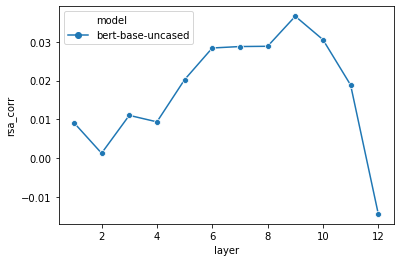

In [9]:
rsa_results_loc = '../data/results/basic_rsa_2020_{}.csv'.format(date)
rsa_res = pd.read_csv(rsa_results_loc)
sns.lineplot(x='layer', y='rsa_corr', hue='model', style='model', markers=True, data=rsa_res)

In [10]:
date = '06_03_16_42'

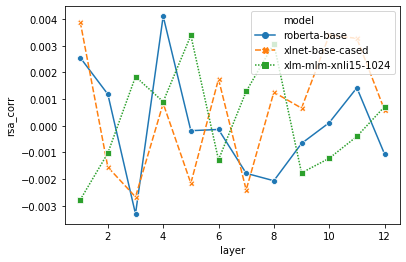

In [11]:
rsa_results_loc = '../data/results/random_rsa_2020_{}.csv'.format(date)
rsa_res = pd.read_csv(rsa_results_loc)
sns.lineplot(x='layer', y='rsa_corr', hue='model', style='model', markers=True, data=rsa_res)

In [12]:
rsa_res.rsa_signif.min()

0.0

In [13]:
rsa_res.rsa_signif.max()

0.13565507177292158

In [14]:
import os
sorted(os.listdir('../data/results'))

['basic_rsa_2020_05_12_15_13.csv',
 'basic_rsa_2020_05_12_16_20.csv',
 'basic_rsa_2020_05_19_09_45.csv',
 'basic_rsa_2020_05_19_09_48.csv',
 'basic_rsa_2020_05_28_10_46.csv',
 'basic_rsa_2020_06_03_16_42.csv',
 'basic_rsa_2020_06_11_14_11.csv',
 'basic_rsa_2020_06_16_10_52.csv',
 'basic_rsa_cv_2020_05_12_11_36.csv',
 'basic_rsa_cv_2020_05_12_14_48.csv',
 'basic_rsa_cv_2020_05_12_15_09.csv',
 'cluster_analysis_results.csv',
 'compositional_probe_2_v_2_test_results.csv',
 'correlations_in_range.csv',
 'finegrained_binom_results_df.csv',
 'finegrained_head_mod_binom_results_lin_reg.csv',
 'lin_reg_probing_cv_2020_05_12_11_23.csv',
 'lin_reg_probing_cv_2020_05_12_11_31.csv',
 'lin_reg_probing_cv_2020_05_12_11_36.csv',
 'lin_reg_probing_cv_2020_05_12_16_20.csv',
 'lin_reg_probing_cv_2020_05_19_09_45.csv',
 'lin_reg_probing_cv_2020_05_19_09_48.csv',
 'lin_reg_probing_cv_2020_05_28_10_46.csv',
 'lin_reg_probing_cv_2020_06_03_16_42.csv',
 'lin_reg_probing_cv_2020_06_11_14_11.csv',
 'lin_reg_pr

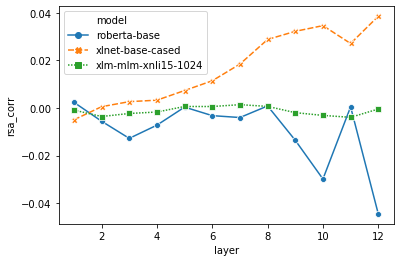

In [15]:
old_date = '05_28_10_46'
rsa_results_loc = '../data/results/basic_rsa_2020_{}.csv'.format(old_date)
rsa_res = pd.read_csv(rsa_results_loc)
sns.lineplot(x='layer', y='rsa_corr', hue='model', style='model', markers=True, data=rsa_res)

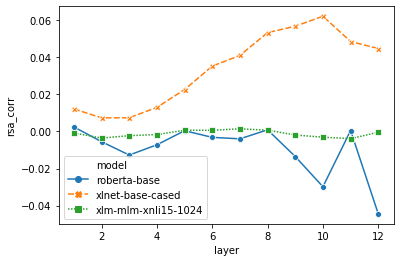

In [16]:
rsa_results_loc = '../data/results/basic_rsa_2020_{}.csv'.format(date)
rsa_res = pd.read_csv(rsa_results_loc)
sns.lineplot(x='layer', y='rsa_corr', hue='model', style='model', markers=True, data=rsa_res)

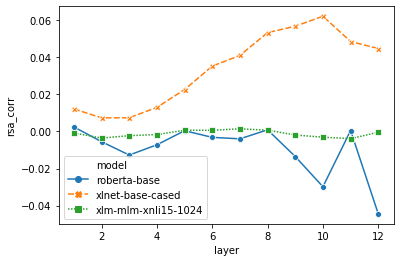

In [17]:
rsa_results_loc = '../data/results/basic_rsa_2020_{}.csv'.format(date)
rsa_res = pd.read_csv(rsa_results_loc)
sns.lineplot(x='layer', y='rsa_corr', hue='model', style='model', markers=True, data=rsa_res)

In [24]:
os.listdir('../data/representations')

['nn_compounds',
 'roberta',
 'bert',
 'distilroberta',
 'nn_compounds_attention',
 'xlnet',
 'xlm',
 'noun_noun_compounds']

In [21]:
rep_loc = '../data/representations'
rows = []
for model_a in os.listdir(rep_loc):
    for model_b in os.listdir(rep_loc):
        if model_b >= model_a:
            continue
        for l in tqdm.tqdm(range(1, 12)):
            model_a_reps = np.load('{}/{}/layer_{}/cls/initial_test.npy'.format(rep_loc, model_a, l))
            model_a_rdm = rsa.get_rdm(model_a_reps)
            model_b_reps = np.load('{}/{}/layer_{}/cls/initial_test.npy'.format(rep_loc, model_b, l))            
            model_b_rdm = rsa.get_rdm(model_b_reps)
            
            res = rsa.correlate_rdms(model_a_rdm, model_b_rdm)
            print(res)
            rows.append({'model_a': model_a, 'model_b': model_b, 'layer': l, 'correlation': res.correlation})

  0%|          | 0/11 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: '../data/representations/nn_compounds/layer_1/cls/initial_test.npy'

In [19]:
fig = sns.lineplot(x='layer', y='correlation', hue='model_a', style='model_a', markers=True, data=df1[df1.model_b == 'roberta'], palette=[sns.color_palette()[1], sns.color_palette()[2]])

NameError: name 'df1' is not defined

In [20]:
fig = sns.lineplot(x='layer', y='correlation', hue='model_b', style='model_b', markers=True, data=df1[df1.model_a == 'xlnet'], palette=[sns.color_palette()[0], sns.color_palette()[2]])

NameError: name 'df1' is not defined

In [ ]:
rsa_res.rsa_corr.max()

In [ ]:
rsa_res.rsa_corr.min()

In [ ]:
rsa_res.rsa_p_val.max()

In [ ]:
rsa_res.rsa_p_val.min()

In [ ]:
ordered_indices = np.argsort(Y)
ordered_Y = Y[ordered_indices]

model_rdm = rsa.get_model_rdm(ordered_Y)

In [ ]:
rsa.plot_mtx(model_rdm, 'Model RDM', figsize=(8,6))
plt.show()

In [ ]:
model_rdm.shape

In [ ]:
model_name = 'roberta-base'
layer = 12

In [ ]:
rep_loc = data_utils.get_hidden_state_file(model_name, layer=layer, data_loc='../data')

reps = np.load(rep_loc)
ordered_reps = reps[ordered_indices]

In [ ]:
distance_metric='euclidean'

In [ ]:
data_rdm = rsa.get_rdm(ordered_reps, distance_metric=distance_metric)

In [ ]:
rsa.plot_mtx(data_rdm, '[CLS] tokens (model={}; layer={}; dist={})'.format(model_name, layer, distance_metric), figsize=(8,6))
plt.show()

In [ ]:
rsa.correlate_rdms(model_rdm, data_rdm)

In [ ]:
transformer_rdm_snippet = data_rdm[:1000, :1000]
rsa.plot_mtx(transformer_rdm_snippet, '[CLS] tokens (Final 1000) (model={}; layer={}; dist={})'.format(model_name, layer, distance_metric), figsize=(8,6))
plt.show()

In [ ]:
ground_truth_rdm_snippet = model_rdm[:1000, :1000]
rsa.plot_mtx(ground_truth_rdm_snippet, "Ground truth RDM (Final 1000)", figsize=(8,6))
plt.show()

In [ ]:
rsa.correlate_rdms(ground_truth_rdm_snippet, transformer_rdm_snippet)

In [ ]:
from sklearn.utils import shuffle

In [ ]:
random_Y = shuffle(Y)
random_ground_truth = rsa.get_model_rdm(random_Y)

In [ ]:
rsa.plot_mtx(random_ground_truth, "Random ground truth", figsize=(8,6))
plt.show()

In [ ]:
rsa.correlate_rdms(random_ground_truth, data_rdm)

In [ ]:
distance_metric='cosine'
data_rdm = rsa.get_rdm(ordered_reps, distance_metric=distance_metric)
rsa.plot_mtx(data_rdm, '[CLS] tokens (model={}; layer={}; dist={})'.format(model_name, layer, distance_metric), figsize=(8,6))
plt.show()

In [ ]:
rsa.correlate_rdms(model_rdm, data_rdm)

# Distribution of scores

In [ ]:
plt.figure(figsize=(10,7.5))
ax = sns.distplot(ordered_Y, hist=True, kde=True, rug=True)

# Most and Least Similar Sample Pairs

In [ ]:
similarity_ranked_indices = np.dstack(np.unravel_index(np.argsort(data_rdm.ravel()), (5708, 5708)))

In [ ]:
similarity_ranked_indices = similarity_ranked_indices.reshape(-1, 2)

In [ ]:
# Filter out duplicates
similarity_ranked_indices = similarity_ranked_indices[similarity_ranked_indices[:, 0] >= similarity_ranked_indices[:, 1]]

In [ ]:
ordered_sentences = np.array(sentence_pairs)[ordered_indices]

In [ ]:
ordered_sentences[16, 0] = 'Mandela back in hospital in "serious but stable" condition'

In [ ]:
[x for x in ordered_sentences if 'Microsoft' in x[0]]

In [ ]:
top_similar_sentences = ordered_sentences[similarity_ranked_indices[:1000]]

In [ ]:
similarity_ranked_indices[:1000]

In [ ]:
top_similar_sentences[0, 0]

In [ ]:
top_similar_sentences[0, 1]

In [ ]:
top_similar_sentences[0, 0] == top_similar_sentences[0, 1]

In [ ]:
similarity_ranked_indices.shape

In [ ]:
# ordered_sentences[similarity_ranked_indices[1000:2000]][:100]

In [ ]:
# [x for x in top_similar_sentences if all(x[0] != x[1]) and all(x[0][::-1] != x[1])]

In [ ]:
[print(i, x) for i, x in enumerate(zip(ordered_Y[similarity_ranked_indices[:10]], ordered_sentences[similarity_ranked_indices[:10]]))]

In [ ]:
[print(i, x) for i, x in enumerate(zip(ordered_Y[similarity_ranked_indices[-10:]], ordered_sentences[similarity_ranked_indices[-10:]]))]

In [ ]:
import os
arr = open('../data/stsbenchmark/sts-train.csv').read().split('\n')

In [ ]:
df.columns

In [ ]:
np.array([x.split('\t') for x in arr])[ np.argwhere(np.array(["For the trillionth time, I've never said rehabilitation doesn't work" in x for x in arr])).reshape(-1)]

# Least Similar Sentences

In [ ]:
least_similar_sentences = ordered_sentences[similarity_ranked_indices[-1000:]]

In [ ]:
similarity_ranked_indices[-1000:]

In [ ]:
res = list(zip(ordered_Y[similarity_ranked_indices[-1000:]][-15:], ordered_sentences[similarity_ranked_indices[-1000:]][-15:]))

In [ ]:
res[0][1].reshape(-1, 1).tolist()

In [ ]:
def print_res(r, start_num=1):
    ids = ["({}a)".format(start_num), "({}b)".format(start_num), "({}a)".format(start_num + 1), "({}b)".format(start_num+1)]
    sents = [' '.join([x[0], x[1][0]]) for x in zip(ids, r[1].reshape(-1, 1).tolist())]
    
    print("sim({}, {}) = {},\tsim({}, {}) = {}".format(ids[0], ids[1], r[0][0], ids[2], ids[3], r[0][1]))
    [print(x) for x in sents]
    
for i, x in zip(range(0, 30, 2), res[-15:]):
    print_res(x, i+1)
    print()

In [ ]:
random_least_sim = shuffle(similarity_ranked_indices[-100:])
res = list(zip(ordered_Y[random_least_sim[-10:]], ordered_sentences[random_least_sim[-10:]]))
for i, x in zip(range(0, 20, 2), res):
    print_res(x, i+1)
    print()

# Correlating features of sample pairs with similarity rank

In [ ]:
import nltk
from nltk.metrics.distance import jaccard_distance
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer


In [ ]:
ps = nltk.stem.PorterStemmer()

In [ ]:
ordered_sentences.shape

In [ ]:
sent = ordered_sentences[0][0]
sent

In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
process = lambda x: tokenizer.tokenize(ps.stem(x))
process(sent)

In [ ]:
processed_sent_pairs = [[process(x[0]), process(x[1])] for x in ordered_sentences]

In [ ]:
avg_num_words_per_pair = [np.mean([len(x[0]), len(x[1])]) for x in processed_sent_pairs]

In [ ]:
diff_len_sents_per_pair = [np.abs(len(x[0]) - len(x[1])) for x in processed_sent_pairs]

In [ ]:
sent_a = processed_sent_pairs[1][0]
sent_b = processed_sent_pairs[1][1]

print(sent_a)
print(sent_b)

In [ ]:
jaccard_distance_per_pair = [jaccard_distance(set(x[0]), set(x[1])) for x in processed_sent_pairs]

In [ ]:
avg_num_words_per_pair_rdm = rsa.get_rdm(np.array(avg_num_words_per_pair).reshape(-1, 1))
rsa.plot_mtx(avg_num_words_per_pair_rdm, 'Average number of words per pair RDM')
rsa.correlate_rdms(avg_num_words_per_pair_rdm, model_rdm)

In [ ]:
diff_len_sents_per_pair_rdm = rsa.get_rdm(np.array(diff_len_sents_per_pair).reshape(-1, 1))
rsa.plot_mtx(diff_len_sents_per_pair_rdm, 'Difference in number of words per pair RDM')
rsa.correlate_rdms(diff_len_sents_per_pair_rdm, model_rdm)

In [ ]:
jaccard_distance_per_pair_rdm = rsa.get_rdm(np.array(jaccard_distance_per_pair).reshape(-1, 1))
rsa.plot_mtx(jaccard_distance_per_pair_rdm, 'Jaccard distance between sentences RDM')
rsa.correlate_rdms(jaccard_distance_per_pair_rdm, model_rdm)

In [ ]:
os.listdir(rep_loc)

In [ ]:
rep_loc = '../data/representations'
rows = []
for model_a in os.listdir(rep_loc):
    print(model_a)
    for l in tqdm.tqdm(range(1, 12)):
        model_a_reps = np.load('{}/{}/layer_{}/cls/initial_test.npy'.format(rep_loc, model_a, l))
        model_a_rdm = rsa.get_rdm(model_a_reps)

        avg_word_res = rsa.correlate_rdms(model_a_rdm, avg_num_words_per_pair_rdm)
        wtext_feature_resres = rsa.correlate_rdms(model_a_rdm, diff_len_sents_per_pair_rdm)
        jaccard_dist_res = rsa.correlate_rdms(model_a_rdm, jaccard_distance_per_pair_rdm)
        
        print('avg_word_res', avg_word_res)
        print('word_diff_res', word_diff_res)
        print('jaccard_dist_res', jaccard_dist_res)
        
        rows.append({'model': model_a, 'rdm': 'avg_num_words_per_pair_rdm', 'layer': l, 'correlation': avg_word_res.correlation, 'p_val': avg_word_res.pvalue})
        rows.append({'model': model_a, 'rdm': 'diff_len_sents_per_pair_rdm', 'layer': l, 'correlation': word_diff_res.correlation, 'p_val': word_diff_res.pvalue})
        rows.append({'model': model_a, 'rdm': 'jaccard_distance_per_pair_rdm', 'layer': l, 'correlation': jaccard_dist_res.correlation, 'p_val': jaccard_dist_res.pvalue})


In [ ]:
text_feature_res = pd.DataFrame(rows)
sns.lineplot(x='layer', y='correlation', hue='model', style='model', markers=True, data=text_feature_res[text_feature_res.rdm == "avg_num_words_per_pair_rdm"])

In [ ]:
sns.lineplot(x='layer', y='correlation', hue='model', style='model', markers=True, data=text_feature_res[text_feature_res.rdm == "diff_len_sents_per_pair_rdm"])

In [ ]:
sns.lineplot(x='layer', y='correlation', hue='model', style='model', markers=True, data=text_feature_res[text_feature_res.rdm == "jaccard_distance_per_pair_rdm"])

# Segment by similarity value range

In [ ]:
inds = [(ordered_Y >= 0) & (ordered_Y < 1),
        (ordered_Y >= 1) & (ordered_Y < 2),
        (ordered_Y >= 2) & (ordered_Y < 3),
        (ordered_Y >= 3) & (ordered_Y < 4),
        (ordered_Y >= 4) & (ordered_Y <= 5)]

In [ ]:
ground_truth.shape

In [ ]:
rsa.correlate_rdms(model_rdm, data_rdm)

In [ ]:
ranges=["0 <= score < 1", "1 <= score < 2", "2 <= score < 3", "3 <= score < 4", "4 <= score <= 5"]
rows = []
for i, valid_inds in enumerate(inds):
    print(ranges[i])
    ground_truth_in_range = model_rdm[valid_inds][:, valid_inds]
    data_rdm_in_range = data_rdm[valid_inds][:, valid_inds]
    res = rsa.correlate_rdms(ground_truth_in_range, data_rdm_in_range)
    print(res)
    rows.append({'range': ranges[i], 'correlation': res.correlation, 'p': res.pvalue})

In [ ]:
df2.to_csv('./res.csv')

In [ ]:
df2 = pd.DataFrame(rows)
print(df2)

In [ ]:
rsa.plot_mtx(model_rdm, 'Model RDM', figsize=(8,6))
plt.show()

# Linear Regression

In [ ]:
results_loc = '../data/results/lin_reg_probing_cv_2020_{}.csv'.format(date)
lin_reg_res = pd.read_csv(results_loc)
sns.lineplot(x='layer', y='lin_reg_corr', hue='model', style='model', markers=True, data=lin_reg_res)